In [1]:
# -------------------------------------------------- #
# Project: Emotion Classification with EEG Signals
# Project done by: 
#     Pamela Reyna
#     Jose Garcia
# -------------------------------------------------- #


# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, Dataset, random_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# import shap

import matplotlib.pyplot as plt

# Plot configuration
plt.style.use(['science','grid'])

# Project: Emotion Classification with EEG Signals

## Exploratory Data Analysis

In [3]:
# Data reading
data = pd.read_csv('emotions_.csv')
# Checking length of dataset
print('Length Dataset',len(data))
# Summary of numerical attributes for continuous variables
data.describe()

Length Dataset 2132


,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


### Analyzing null values

In [4]:
# data.loc[data.isnull()==True] 
print('Columns with null data', '\n', data[data.isnull().any(axis=1)])
print('Columns with null data', '\n', data[data.isna().any(axis=1)])

Columns with null data 
 Empty DataFrame
Columns: [mean_0_a, mean_1_a, mean_2_a, mean_3_a, mean_4_a, mean_d_0_a, mean_d_1_a, mean_d_2_a, mean_d_3_a, mean_d_4_a, mean_d_0_a2, mean_d_1_a2, mean_d_2_a2, mean_d_3_a2, mean_d_4_a2, mean_d_5_a, mean_d_6_a, mean_d_7_a, mean_d_8_a, mean_d_9_a, mean_d_10_a, mean_d_11_a, mean_d_12_a, mean_d_13_a, mean_d_14_a, mean_d_15_a, mean_d_16_a, mean_d_17_a, mean_d_18_a, mean_d_19_a, mean_d_20_a, mean_d_21_a, mean_d_22_a, mean_d_23_a, mean_d_24_a, mean_d_25_a, mean_d_26_a, mean_d_27_a, mean_d_28_a, mean_d_29_a, mean_d_30_a, mean_d_31_a, mean_d_32_a, mean_d_33_a, mean_d_34_a, mean_d_35_a, mean_d_36_a, mean_d_37_a, mean_d_38_a, mean_d_39_a, mean_d_40_a, mean_d_41_a, mean_d_42_a, mean_d_43_a, mean_d_44_a, mean_d_45_a, mean_d_46_a, mean_d_47_a, mean_d_48_a, mean_d_49_a, stddev_0_a, stddev_1_a, stddev_2_a, stddev_3_a, stddev_4_a, stddev_d_0_a, stddev_d_1_a, stddev_d_2_a, stddev_d_3_a, stddev_d_4_a, moments_0_a, moments_1_a, moments_2_a, moments_3_a, moments_4_a,

#### Not null or NA data inside the dataset

### Data types

In [5]:
data.dtypes

mean_0_a     float64
mean_1_a     float64
mean_2_a     float64
mean_3_a     float64
mean_4_a     float64
              ...   
fft_746_b    float64
fft_747_b    float64
fft_748_b    float64
fft_749_b    float64
label         object
Length: 2549, dtype: object

#### All numeric (Float64) types except for the label, object (string)

### Distribution

In [6]:
#Split data for plots
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

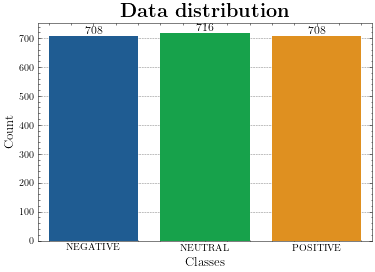

In [7]:
## Distrubution od the classes
# PLOTS
plt.style.use(['science','grid'])
plt.rcParams['figure.figsize']=[6,5]
plt.rcParams.update({'font.size': 17})

# plt.figure(figsize=(25,7))

plt.title("Data distribution of Emotions")

# plt.style.use('fivethirtyeight')
# sns.set_theme(style="whitegrid")
# data.plot.hist(bins=50)
a = sns.countplot(x='label', data=data)
a.bar_label(a.containers[0],size=12)
a.set_xlabel("Classes",fontsize=13)
a.set_ylabel("Count",fontsize=13)
a.axes.set_title(r'\textbf{Data distribution}',size=20)
plt.show()

fig = a.get_figure()
fig.savefig('img/DataBaseSize.png', dpi=300) 


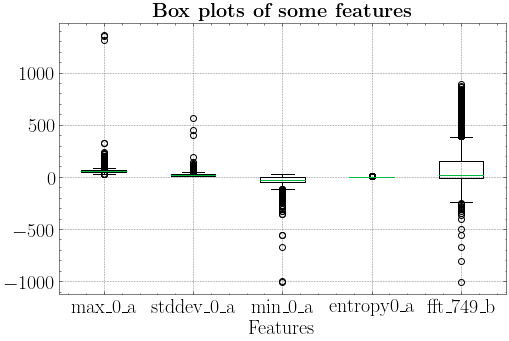

In [8]:
## Distribution of some features in order to check if normalization needed
# create a figure with a single axis
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots()

# create a box plot for each feature in the dataset
ax.boxplot(data[['max_0_a', 'stddev_0_a','min_0_a','entropy0_a','fft_749_b']].values)
ax.set_xticklabels(['max_0_a', 'stddev_0_a','min_0_a','entropy0_a','fft_749_b'])

plt.xlabel('Features', size = 20)
# plt.ylabel('Features', size = 12)
plt.title(r'\textbf{Box plots of some features}', size = 20)
plt.savefig('img/boxPlot.png', dpi=300)

### Frequency features analysis

#### Take into account that the FFT feature are the top 10 frequencies after filtering DC and Mains fq of each 1s window

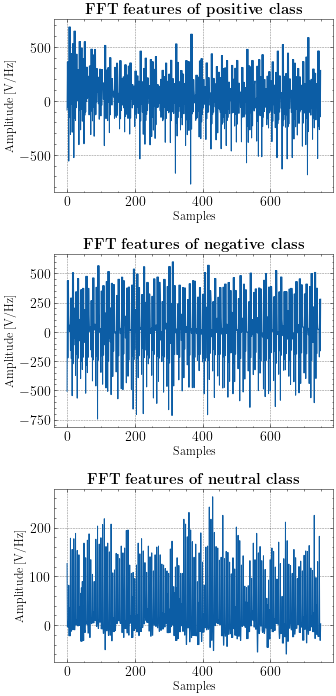

In [17]:
# PLOT OF THE FREQUENCY RESULTS

#Plotting Positive DataFrame
plt.rcParams['figure.figsize']=[5,10]
fig,axs = plt.subplots(3,1)

x_label = 'Samples'
y_label =  'Amplitude [V/Hz]'

tittle_size = 15
labels_size = 12

#Split data for plots
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

# means = 

axs[0].plot(range(len(sample_pos)), sample_pos)
axs[0].set_title(r'\textbf{FFT features of positive class}',size=tittle_size)
axs[0].set_xlabel(x_label,size=labels_size)
axs[0].set_ylabel(y_label,size=labels_size)
# plt.savefig('img/DataBaseSize.png, dpi=300)
                  
# '''As we can see, most of the Negative Signals are from greater than 600 to and less than than -600'''

#Plotting Negative DataFrame
axs[1].plot(range(len(sample_neg)), sample_neg)
axs[1].set_title(r'\textbf{FFT features of negative class}',size=tittle_size)
axs[1].set_xlabel(x_label,size=labels_size)
axs[1].set_ylabel(y_label,size=labels_size)


#Plotting Neutral DataFrame
axs[2].plot(range(len(sample_neu)), sample_neu)
axs[2].set_title(r'\textbf{FFT features of neutral class}',size=tittle_size)
axs[2].set_xlabel(x_label,size=labels_size)
axs[2].set_ylabel(y_label,size=labels_size)
# axs[0].set_ylim([0,y_lim])
fig.tight_layout()
plt.savefig('img/freqRaw.png', dpi=300)

'''As we can see, most of the Negative Signals are from greater than 600 to and less than than -600'''

'''As we can see, most of the Negative Signals are from less than 600 to and greater than -600'''

'''As we can see, most of the Neutral Signals ae in between -50 to 250 '''

## Feature reduction

In [10]:
# Correlation Matrix
corrmat = data.corr()
top_corr_features = corrmat.index

In [11]:
# Example plot of the last 7 features of the correlation matrix
examples = corrmat[corrmat.columns[-7:]][-7:]
examples

,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
fft_743_b,1.000000,-0.856312,0.415781,-0.459876,0.499272,0.499272,-0.459876
fft_744_b,-0.856312,1.000000,-0.431711,0.531019,-0.355117,-0.355117,0.531019
fft_745_b,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_749_b,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000


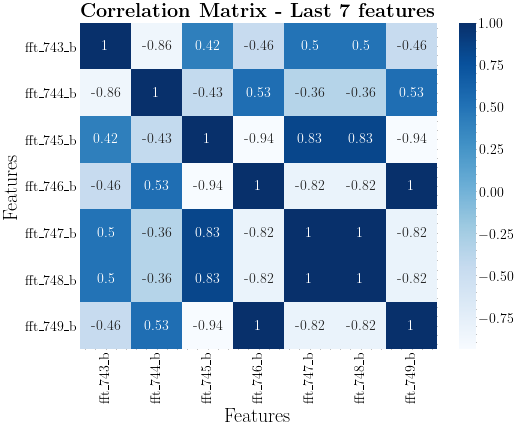

In [12]:
#Plotting  example of the correlation matrix
plt.rcParams['figure.figsize']=[8,6]
plt.rcParams.update({'font.size': 14})

g=sns.heatmap(examples ,annot=True,cmap='Blues')

plt.xlabel('Features', size = 20)
plt.ylabel('Features', size = 20)
plt.title(r'\textbf{Correlation Matrix - Last 7 features}', size = 20)

plt.savefig('img/corrMatrix.png', dpi=300)


In [13]:
## Dropping features above 95% of correlation

# Absolute of corre
corr_matrix_abs = corrmat.abs()

# Select Upper numbers from correlation - the rest is repeted
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))

# Greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#Create Copy
data_new = data.copy()
# Drop features 
data_new.drop(to_drop, axis=1, inplace=True)

# Filtered data set
data_new

<ipython-input-13-446d8f8162c4>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))


,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_730_b,fft_732_b,fft_735_b,fft_736_b,fft_737_b,fft_740_b,fft_742_b,fft_745_b,fft_747_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,-606.0,-261.0,-399.0,374.00,-185.00,74.3,20.300,-215.0,-162.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,225.0,-27.7,97.4,-19.00,40.70,130.0,-21.800,182.0,-31.60,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-251.0,-95.7,-177.0,159.00,-48.80,-534.0,-233.000,-267.0,-148.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,322.0,38.4,245.0,-61.90,-5.08,-183.0,-243.000,132.0,9.53,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,252.0,-37.4,172.0,15.90,-7.25,114.0,38.100,119.0,23.90,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,260.0,-37.2,194.0,-3.74,-18.40,155.0,0.218,95.2,47.20,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-50.5,-57.1,-152.0,199.00,-93.00,-661.0,-324.000,-35.5,-59.80,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,173.0,13.1,-441.0,385.00,-214.00,-232.0,-160.000,408.0,-10.50,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-722.0,-218.0,151.0,-7.48,34.20,-99.7,-27.600,-656.0,-271.00,NEGATIVE


In [14]:
## Mapping functions: 
    # Discretize label column
    # Apply tranformation: Standarization or Normalization

## transformation = ['std','norm','none']
def Transform_data(data, transformation  = 'std'):
    
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    x=data_encoded.drop(["label"]  ,axis=1)
    y = data_encoded.loc[:,'label'].values
    
    if(transformation == 'std'):
        # Standarization
        scaler = StandardScaler()
        # Brain Signals
        scaler.fit(x)
        X = scaler.transform(x)
    if(transformation == 'norm'):
        # Normalization
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(x)
        X = min_max_scaler.transform(x)
    
    if(transformation == 'none'):
        X = x.values.tolist()
        print(X)
        
    Y = torch.from_numpy(y)
    return torch.Tensor(X),Y

In [15]:
# Splitting dataset into train, val and test
# Original dataset
X,Y = Transform_data(data, transformation  = 'std')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 4)

# Filtered dataset
X_cleaned,Y_cleaned = Transform_data(data_new, transformation  = 'std')
x_train_cleaned, x_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, Y_cleaned, test_size = 0.2, random_state = 4)
x_val_cleaned, x_test_cleaned, y_val_cleaned, y_test_cleaned = train_test_split(x_test_cleaned, y_test_cleaned, test_size = 0.5, random_state = 4)


In [16]:
## Method not used in the analysis = Testing posibility 
# RandomForestRegressor for feature importance - Too many features, not useful methods based on results

# x_train.shape
# rf = RandomForestRegressor(n_estimators=300)
# rf.fit(x_train, y_train)
# sorted_idx = rf.feature_importances_.argsort()
# sort_data_labels = data.columns[1:][sorted_idx]
# sort_feature_importance =  rf.feature_importances_[sorted_idx]
# plt.barh(sort_data_labels[:10], sort_feature_importance[:10])

## Models

In [19]:
#checking shape of xs
print(x_train.shape, x_val.shape, x_test.shape)

#checking shape of xs
print(x_train_cleaned.shape, x_val_cleaned.shape, x_test_cleaned.shape)

torch.Size([1705, 2548]) torch.Size([213, 2548]) torch.Size([214, 2548])
torch.Size([1705, 1291]) torch.Size([213, 1291]) torch.Size([214, 1291])


### MLP Model

In [20]:
# Model definition: Fully connected layer with RELU as activation function
class MyModel(nn.Module):
    def __init__(self, input_shape, hidden_size, num_classes):
        super(MyModel, self).__init__()
        # this is a 2 Layer Multiperceptron
        self.fc1 = nn.Linear(input_shape, hidden_size)
        # define a non linearity 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # for training we dont use probabilities bebcause we want to cross entropy with the logits 
        return out

In [21]:
# Network parameter: Learning Rate, Epochs, Batch Size
lr = 0.0001
num_epochs = 20
# good batch sizes: 16 - 128
batch_size = 64

In [22]:
## Implementation of the network for ORIGINAL Dataset: 
    # Definition of the optimizer
    # Trainig
    # Validation
    
model = MyModel(x_train.shape[1], x_train.shape[1]//2 ,y_train.max()+1)

optim = torch.optim.Adam(model.parameters(),lr=lr)
loss = nn.CrossEntropyLoss()
num_samples = x_train.size(0)
# iterate through epochs, i.e. see the entire dataset several times
losses = []
all_accuracies = []
print("Number of Batches per Epoch: ", num_samples // batch_size)
for epoch in range(num_epochs):
    randperm = torch.randperm(num_samples)
    x_train_shuffled = x_train[randperm]
    y_train_shuffled = y_train[randperm]
    
    # iterate through sets of samples in the dataset
    # see the entire dataset ONCE
#     print("Epoch: ", epoch)
    for batch_id in range(num_samples // batch_size):
        optim.zero_grad()
        batch_x = x_train[(batch_id*batch_size):((batch_id+1)*batch_size)]
        batch_y = y_train[(batch_id*batch_size):((batch_id+1)*batch_size)]
        logits = model.forward(batch_x)
        output = loss(logits, batch_y)
        
        # record losses over training steps
        losses.append(output.detach())
        output.backward()
        
        # optim.step does the update of the parameters 
        optim.step()

#   print("Evaluating performance on validation set")
    accuracies = []
    y_pred = torch.Tensor([])
    for batch_id in range((x_val.size(0) // batch_size)+1):
        batch_x = x_val[(batch_id*batch_size):((batch_id+1)*batch_size)]
        batch_y = y_val[(batch_id*batch_size):((batch_id+1)*batch_size)]
        logits = model.forward(batch_x)
        probs = torch.nn.Softmax(dim=-1)(logits)
        pred_classes = torch.argmax(probs, dim=-1)
        y_pred = torch.cat((y_pred,pred_classes))
        # record accuraries for samples in validation set
        accuracies.extend((pred_classes == batch_y).tolist())
    # record performance on entire validation set over epochs
    # False is zero, True is one
    all_accuracies.append(torch.Tensor(accuracies).mean().item())



Number of Batches per Epoch:  26


In [23]:
## Implementation of the network for FILTERED Dataset: 
    # Definition of the optimizer
    # Trainig
    # Validation

model_features = MyModel(x_train_cleaned.shape[1], x_train_cleaned.shape[1]//2 ,y_train_cleaned.max()+1)

optim = torch.optim.Adam(model_features.parameters(),lr=lr)
loss = nn.CrossEntropyLoss()
num_samples = x_train_cleaned.size(0)
# iterate through epochs, i.e. see the entire dataset several times
losses_features = []
all_accuracies_features = []
print("Number of Batches per Epoch: ", num_samples // batch_size)
for epoch in range(num_epochs):
    randperm = torch.randperm(num_samples)
    x_train_f_shuffled = x_train_cleaned[randperm]
    y_train_f_shuffled = y_train_cleaned[randperm]
    # iterate through sets of samples in the dataset
    # see the entire dataset ONCE
#     print("Epoch: ", epoch)
    for batch_id in range(num_samples // batch_size):
        optim.zero_grad()
        batch_x = x_train_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
        batch_y = y_train_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
        logits = model_features.forward(batch_x)
        output = loss(logits, batch_y)
        # record losses over training steps
        losses_features.append(output.detach())
        output.backward()
        # optim.step does the update of the parameters 
        optim.step()

    accuracies = []
    y_pred_features = torch.Tensor([])
    for batch_id in range((x_val_cleaned.size(0) // batch_size)+1):
        batch_x = x_val_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
        batch_y = y_val_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
        logits = model_features.forward(batch_x)
        probs = torch.nn.Softmax(dim=-1)(logits)
        pred_classes_features = torch.argmax(probs, dim=-1)
        y_pred_features = torch.cat((y_pred_features,pred_classes_features))
        # record accuraries for samples in validation set
        accuracies.extend((pred_classes_features == batch_y).tolist())
    # record performance on entire validation set over epochs
    # False is zero, True is one
    all_accuracies_features.append(torch.Tensor(accuracies).mean().item())


Number of Batches per Epoch:  26


In [24]:
# Creation of function to plot Confusion Matrix

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

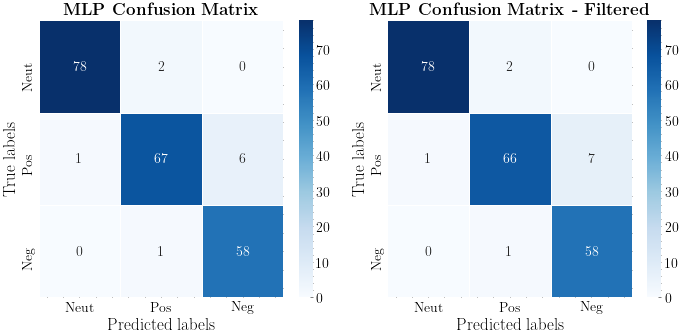

In [25]:
# Compute the confusion matrix ORIGINAL DATA
mlp_cm = confusion_matrix(y_val, y_pred)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

sns.heatmap(mlp_cm, annot=True, cmap='Blues', linewidths=0.6, fmt='g', 
            xticklabels=["Neut","Pos","Neg"], yticklabels=["Neut","Pos","Neg"], ax=axs[0])
axs[0].set_xlabel('Predicted labels', size = 17)
axs[0].set_ylabel('True labels', size = 17)
axs[0].set_title(r'\textbf{MLP Confusion Matrix' , size = 17)

# Compute the confusion matrix FILTERED DATA
mlp_cm_features = confusion_matrix(y_val_cleaned, y_pred_features)

#Plotting Positive DataFrame
plt.rcParams['figure.figsize']=[6,5]
sns.heatmap(mlp_cm_features, annot=True, cmap='Blues', linewidths=0.6, fmt='g', 
            xticklabels=["Neut","Pos","Neg"], yticklabels=["Neut","Pos","Neg"], ax=axs[1])

axs[1].set_xlabel('Predicted labels', size = 17)
axs[1].set_ylabel('True labels', size = 17)
axs[1].set_title( r'\textbf{MLP Confusion Matrix - Filtered', size = 17)

plt.tight_layout()
# Saving plot
plt.savefig('img/confMat_both.png', dpi=300)  


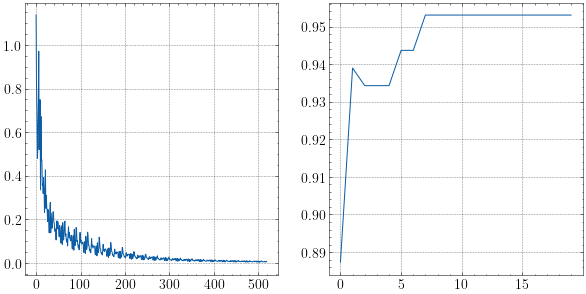

In [26]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(losses)
ax2.plot(all_accuracies)
plt.show()

In [27]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {losses[-1]*100}",f"\nAccuracy on Training: {accuracies[-1]*100}%")

Loss on testing: 0.6420287489891052 
Accuracy on Training: 100%


### Stadistical Models: GNB, SVM, Logistic Regression, Random Forest

In [28]:
# NO FILTERED DATA
# Convert Tensors to NumPy arrays
x_train_np = x_train.numpy()
y_train_np = y_train.numpy()
x_test_np = x_test.numpy()
y_test_np = y_test.numpy()

gnb = GaussianNB()
svm = SVC(kernel='linear')
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

classifier = [gnb, svm, logreg, rf]
score = []
cm = []
for case in classifier:
    case.fit(x_train_np, y_train_np)
    pred = case.predict(x_test_np)
    accuracy = accuracy_score(y_test_np, pred)
    score.append(accuracy)
    conf = confusion_matrix(y_test_np, pred)
    cm.append(conf)
    # Disregard the Decision Tree, since its score is low (93%).


The accuracy for GNB is 64.95%
The accuracy for SVM is 95.79%
The accuracy for Logistic Regression is 96.73%
The accuracy for Random Forest is 98.6%


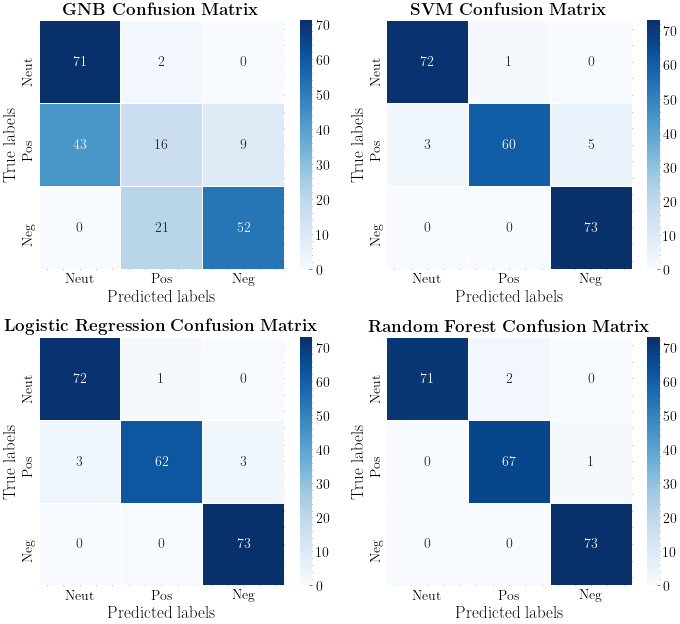

In [29]:
# PLOT FOR STATS MODEL WITHOUT FILTERING

title = ['GNB', 'SVM', 'Logistic Regression', 'Random Forest']

fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs = axs.flatten()
for i,cfmtx in enumerate(cm):
    sns.heatmap(cfmtx, annot=True, cmap='Blues', linewidths=0.6, fmt='g', 
                xticklabels=["Neut","Pos","Neg"], yticklabels=["Neut","Pos","Neg"], ax=axs[i])
    axs[i].set_xlabel('Predicted labels', size = 17)
    axs[i].set_ylabel('True labels', size = 17)
    axs[i].set_title( r'\textbf{{{}}}'.format(title[i] + ' Confusion Matrix') , size = 17)

plt.tight_layout()
plt.savefig('img/confMat_Stats.png', dpi=300)

for name,i in zip(title,score):
    print(f'The accuracy for {name} is {round(i*100,2)}%')

In [33]:
# FILTERED DATA
# Convert Tensors to NumPy arrays
x_train_np = x_train_cleaned.numpy()
y_train_np = y_train_cleaned.numpy()
x_test_np = x_test_cleaned.numpy()
y_test_np = y_test_cleaned.numpy()

gnb = GaussianNB()
svm = SVC(kernel='linear')
logreg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

classifier = [gnb, svm, logreg,  rf]
score = []
cm = []
for case in classifier:
    case.fit(x_train_np, y_train_np)
    pred = case.predict(x_test_np)
    accuracy = accuracy_score(y_test_np, pred)
    score.append(accuracy)
    conf = confusion_matrix(y_test_np, pred)
    cm.append(conf)
    # Disregard the Decision Tree, since its score is low (93%).


The accuracy for GNB is 69.16%
The accuracy for SVM is 95.33%
The accuracy for Logistic Regression is 96.73%
The accuracy for Random Forest is 98.6%


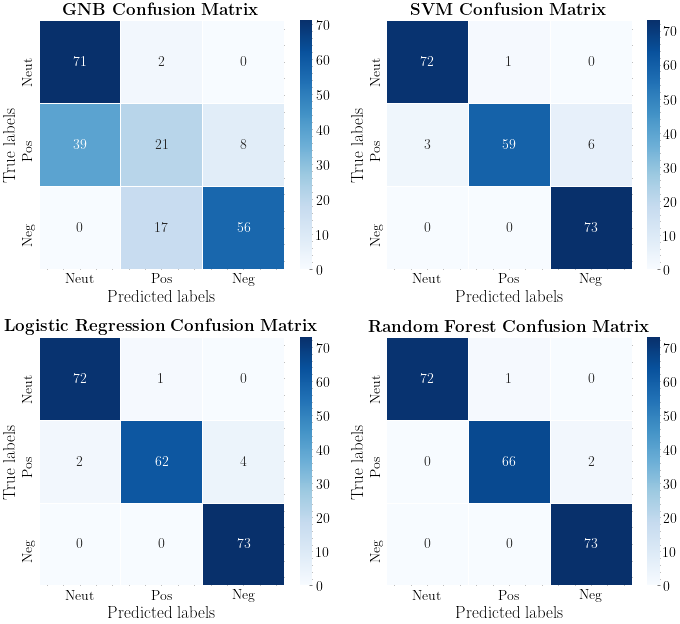

In [34]:
# PLOT FOR STATS MODEL WITH FILTERING

title = ['GNB', 'SVM', 'Logistic Regression', 'Random Forest']

fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs = axs.flatten()
for i,cfmtx in enumerate(cm):
    sns.heatmap(cfmtx, annot=True, cmap='Blues', linewidths=0.6, fmt='g', 
                xticklabels=["Neut","Pos","Neg"], yticklabels=["Neut","Pos","Neg"], ax=axs[i])
    axs[i].set_xlabel('Predicted labels', size = 17)
    axs[i].set_ylabel('True labels', size = 17)
    axs[i].set_title( r'\textbf{{{}}}'.format(title[i] + ' Confusion Matrix') , size = 17)

plt.tight_layout()
plt.savefig('img/confMat_Stats.png', dpi=300)

for name,i in zip(title,score):
    print(f'The accuracy for {name} is {round(i*100,2)}%')

In [35]:
## Evaluate TEST and VAL of MLP again for stats

accuracies = []
for batch_id in range(x_train.shape[0] // batch_size):
    batch_x = x_val[(batch_id*batch_size):((batch_id+1)*batch_size)]
    batch_y = y_val[(batch_id*batch_size):((batch_id+1)*batch_size)]
    logits = model.forward(batch_x)
    probs = torch.nn.Softmax(dim=-1)(logits)
    pred_classes = torch.argmax(probs, dim=-1)
    # record accuraries for samples in validation set
    accuracies.extend((pred_classes == batch_y).tolist())
print("Val Accuracy is ", torch.Tensor(accuracies).mean())

accuracies_ = []
for batch_id in range(x_train_cleaned.shape[0] // batch_size):
    batch_x_ = x_val_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
    batch_y_ = y_val_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
    logits_ = model_features.forward(batch_x_)
    probs_ = torch.nn.Softmax(dim=-1)(logits_)
    pred_classes_ = torch.argmax(probs_, dim=-1)
    # record accuraries for samples in validation set
    accuracies_.extend((pred_classes_ == batch_y_).tolist())
print("Val Accuracy is - cleaned ", torch.Tensor(accuracies_).mean())

accuracies = []
for batch_id in range(x_train.shape[0] // batch_size):
    batch_x = x_test[(batch_id*batch_size):((batch_id+1)*batch_size)]
    batch_y = y_test[(batch_id*batch_size):((batch_id+1)*batch_size)]
    logits = model.forward(batch_x)
    probs = torch.nn.Softmax(dim=-1)(logits)
    pred_classes = torch.argmax(probs, dim=-1)
    # record accuraries for samples in validation set
    accuracies.extend((pred_classes == batch_y).tolist())
print("Test Accuracy is ", torch.Tensor(accuracies).mean())

accuracies_ = []
for batch_id in range(x_train_cleaned.shape[0] // batch_size):
    batch_x_ = x_test_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
    batch_y_ = y_test_cleaned[(batch_id*batch_size):((batch_id+1)*batch_size)]
    logits_ = model_features.forward(batch_x_)
    probs_ = torch.nn.Softmax(dim=-1)(logits_)
    pred_classes_ = torch.argmax(probs_, dim=-1)
    # record accuraries for samples in validation set
    accuracies_.extend((pred_classes_ == batch_y_).tolist())
print("Test Accuracy is - cleaned ", torch.Tensor(accuracies_).mean())

Val Accuracy is  tensor(0.9531)
Val Accuracy is - cleaned  tensor(0.9484)
Test Accuracy is  tensor(0.9720)
Test Accuracy is - cleaned  tensor(0.9673)


### Results without stadarization
#### FOR MLP

Val Accuracy is  tensor(0.8826)

Val Accuracy is - cleaned  tensor(0.8638)

Test Accuracy is  tensor(0.8832)

Test Accuracy is - cleaned  tensor(0.8925)


#### FOR STATS WITHOUT FILTER

The accuracy for GNB is 40.19%

The accuracy for SVM is Hardware issues

The accuracy for Logistic Regression is 34.11%

The accuracy for Random Forest is 98.6%

#### FOR STATS  FILTERED

The accuracy for GNB is 34.58%

The accuracy for SVM is Hardware issues

The accuracy for GNB is 34.11%

The accuracy for GNB is 99.07%

### Results with stadarization - We take this model at the end to present
#### FOR MLP

Val Accuracy is  tensor(0.9531)

Val Accuracy is - cleaned  tensor(0.9484)

Test Accuracy is  tensor(0.9673)

Test Accuracy is - cleaned  tensor(0.9626)

#### FOR STATS WITHOUT FILTER

The accuracy for GNB is 64.95%

The accuracy for SVM is 95.79%

The accuracy for Logistic Regression is 96.73%

The accuracy for Random Forest is 99.07%

#### FOR STATS  FILTERED

The accuracy for GNB is 69.16%

The accuracy for SVM is 95.33%

The accuracy for Logistic Regression is 96.73%

The accuracy for Random Forest is 99.07%

### Results with Normalization
#### FOR MLP

Val Accuracy is  tensor(0.8967)

Val Accuracy is - cleaned  tensor(0.9484)

Test Accuracy is  tensor(0.8925)

Test Accuracy is - cleaned  tensor(0.9720)

#### FOR STATS WITHOUT FILTER
The accuracy for GNB is 65.42%

The accuracy for SVM is 94.39%

The accuracy for Logistic Regression is 93.93%

The accuracy for Random Forest is 99.07%

#### FOR STATS  FILTERED
The accuracy for GNB is 69.16%

The accuracy for SVM is 93.93%

The accuracy for Logistic Regression is 93.93%

The accuracy for Random Forest is 98.6%

In [ ]:
# Entonces está el amanecer y una fría soledad en la que caben la alegría,
# los recuerdos, usted y acaso tantos más.